In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [69]:
data = pd.read_csv("data_concatVectors.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.asarray(y_train.values.tolist())
y_train = y_train.reshape(y_train.shape[0],1)
y_test = np.asarray(y_test.values.tolist())
y_test = y_test.reshape(y_test.shape[0],1)

In [83]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, log_loss
import matplotlib.pyplot as plt
def displayStats(model,modelname: str,test: np.ndarray,truth: np.ndarray):
    predictions = model.predict(test) #all of them should have this
    print(modelname+" STATS:")
    print("ACCURACY: "+str(accuracy_score(truth,predictions)))

   #not all models have predict_proba
    if callable(getattr(model, "predict_proba", None)):
        soft_predictions = model.predict_proba(test)[:,1]
        print("ROC AUC: "+str(roc_auc_score(truth,soft_predictions)))
    
    #log loss
    print("LOG LOSS: "+str(log_loss(truth,predictions)))

    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

# Attempting some Linear Models, both on the raw data, as well as after different types of scaling
---

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


rknc = KNeighborsClassifier()
standardized_knc = make_pipeline(StandardScaler(),KNeighborsClassifier())
minmaxed_knc = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
robust_knc = make_pipeline(RobustScaler(),KNeighborsClassifier())
rsvc = SVC()
psvc = make_pipeline(StandardScaler(),SVC())

rknc.fit(X_train,y_train)
standardized_knc.fit(X_train,y_train)
minmaxed_knc.fit(X_train,y_train)
robust_knc.fit(X_train,y_train)
rsvc.fit(X_train,y_train)
psvc.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

KNC STATS:
ACCURACY: 0.6222222222222222
ROC AUC: 0.7956349206349206
LOG LOSS: 13.04826649494144


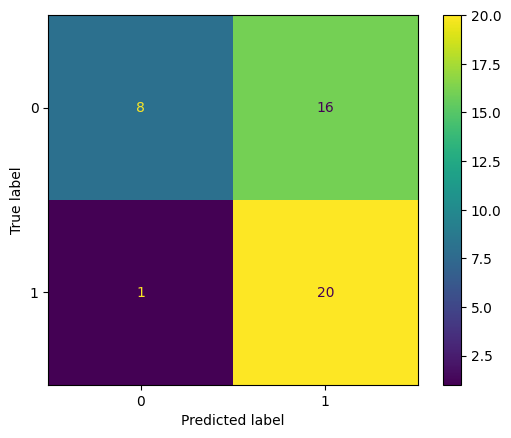

Standardized KNC STATS:
ACCURACY: 0.6222222222222222
ROC AUC: 0.822420634920635
LOG LOSS: 13.048248726109657


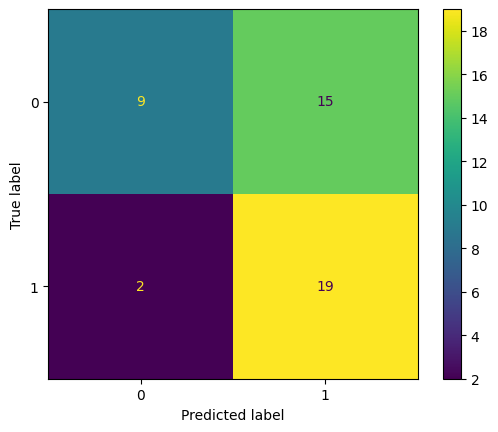

Minmaxed KNC STATS:
ACCURACY: 0.6
ROC AUC: 0.8174603174603174
LOG LOSS: 13.815777090441005


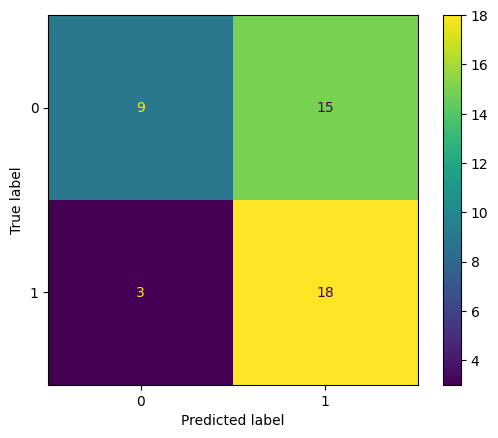

Robust KNC STATS:
ACCURACY: 0.6222222222222222
ROC AUC: 0.8095238095238095
LOG LOSS: 13.04826649494144


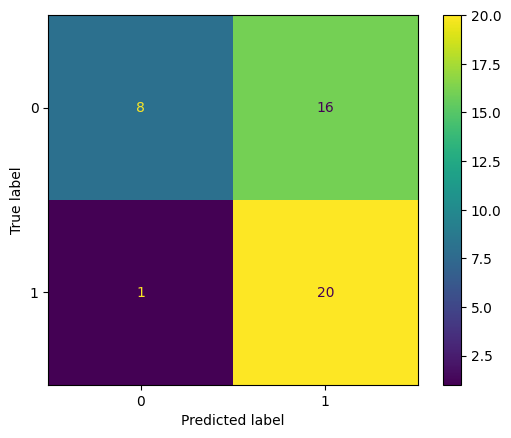

Raw SVC STATS:
ACCURACY: 0.6888888888888889
LOG LOSS: 10.745610326620266


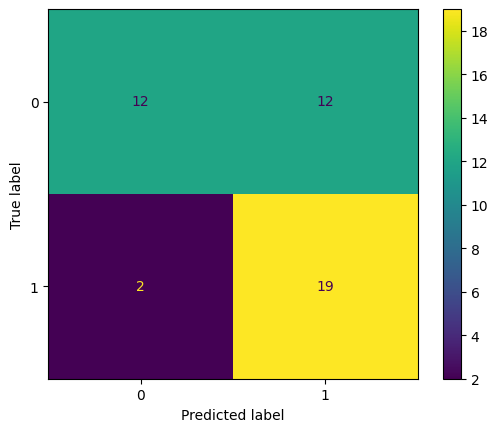

Pipelined SVC STATS:
ACCURACY: 0.8
LOG LOSS: 6.907861891972829


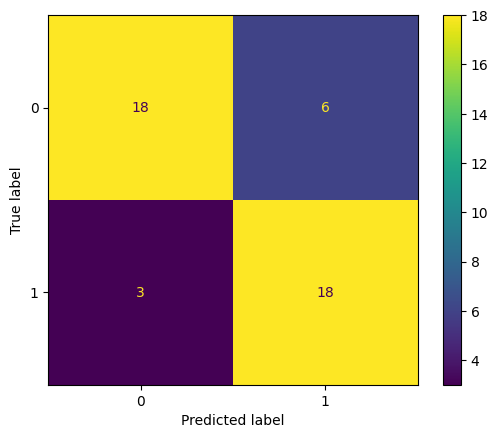

In [102]:
displayStats(rknc,"KNC", X_test,y_test)
displayStats(standardized_knc,"Standardized KNC", X_test,y_test)
displayStats(minmaxed_knc,"Minmaxed KNC", X_test,y_test)
displayStats(robust_knc,"Robust KNC", X_test,y_test)
displayStats(rsvc,"Raw SVC", X_test,y_test)
displayStats(psvc,"Pipelined SVC", X_test,y_test)